In [41]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import math

In [42]:
# Load and clean the dataset
data = pd.read_csv('glass.csv')

In [43]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [44]:
print("Checking whether there is null values:\n", data.isnull().sum())

Checking whether there is null values: RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [45]:
print("Checking whether there is duplicated values:", data.duplicated().sum())

Checking whether there is duplicated values: 1


In [46]:
# Drop the duplicated value
data.drop_duplicates(inplace=True)

In [47]:
print("Checking whether there is duplicated values:", data.duplicated().sum())

Checking whether there is duplicated values: 0


In [48]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [49]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [66]:
# Separate the features and target variable
X = data.drop('Type', axis=1)
y = data['Type']

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)  # Use transform() here to prevent data leakage

In [69]:
# Define the KNN model function
def knn_func(train_x, train_label, test_x, k):
    """
    train_x - training features
    train_label - training targets
    test_x - validation features
    k - number of nearest neighbors (int)
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_label)
    prediction = knn.predict(test_x)
    return prediction

In [70]:
# Determine the maximum k value to consider
n = data.shape[0]
k_max = int(math.sqrt(n))
print("Max K value:", k_max)

Max K value: 14


In [71]:
# Evaluate KNN for different k values
k_values = range(1, 16)
accuracies = []

for k in k_values:
    y_pred = knn_func(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

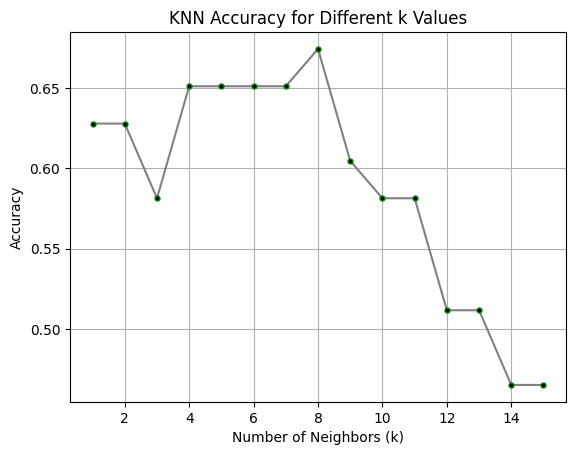

In [72]:
# Plot the results
plt.plot(k_values, accuracies, color="grey", marker=".", ms=7, mfc="black", mec="green")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.grid(True)
plt.show()

In [73]:
# Determine the best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(f"The best value for n_neighbors is {best_k}.")

The best value for n_neighbors is 8.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('glass.csv')
data.drop_duplicates(inplace=True)

# Separate the features and target variable
X = data.drop('Type', axis=1)
y = data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Tuning hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2f}")

# Evaluate the tuned model
tuned_rf_clf = grid_search.best_estimator_
tuned_y_pred = tuned_rf_clf.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_y_pred)
print(f"Tuned accuracy: {tuned_accuracy:.2f}")

Accuracy: 0.77
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.78
Tuned accuracy: 0.77
